In [1]:
# For installation of these packages you have to go to ANACONDA CMD 

#pip install -U scikit-learn
#pip install matplotlib
#pip install opencv-python
#pip install numpy
#pip install Optimizers
#pip install tensorflow
#Tensorflow (Keras uses TensorFlow in backend and for some image preprocessing)

import matplotlib.pyplot as plt
import cv2
import numpy as np
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #Machine lEARNING Model preparation
from sklearn.utils import shuffle #For shuffling the Images data

In [2]:
data = pd.read_csv(r"A_Z Handwritten Data.csv").astype('float32')
print(data.head(10)) #We are getting first ten images data
#This data set contains all the Images in data form

     0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.639  0.640  0.641  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
5  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
6  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
7  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
8  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   
9  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0    0.0    0.0   

   0.642  0.643  0.644  0.645  0.646  0.647  0.648  
0    0.0    0.0    0.0    0.0    0.0    0.0    0.0  
1 

In [3]:
X = data.drop('0',axis = 1)
y = data['0'] #and put the 0 column in the label y

In [4]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))
print("Train data shape: ", train_x.shape)
print("Test data shape: ", test_x.shape)


Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [5]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

In [6]:
#convert the any Labels number to integers 
#Firstly we convert the labels into integer values and append into 
#the count list according to the label. 
#This count list has the number of images present in the dataset belonging to each alphabet.
y_int = np.int0(y)
count = np.zeros(26, dtype='int')
print(count)
for i in y_int:
   count[i] +=1
    

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [7]:
#get the list named alphabets for the Comparision purpose 
alphabets = []
for i in word_dict.values():
    alphabets.append(i)

In [8]:
alphabets[0]

'A'

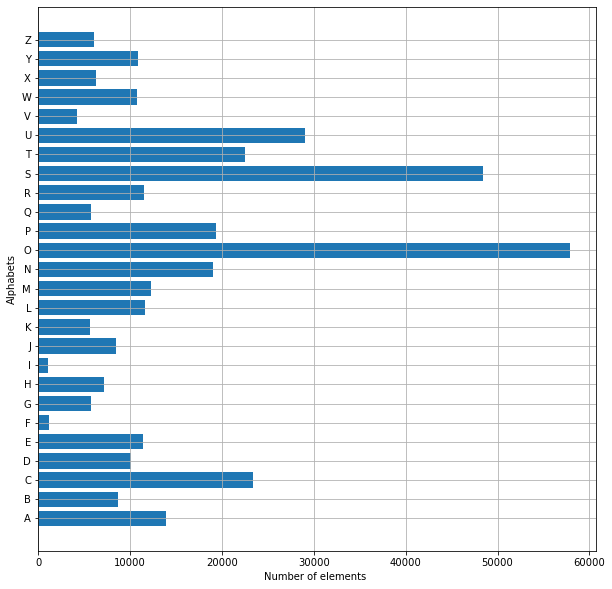

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)
plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

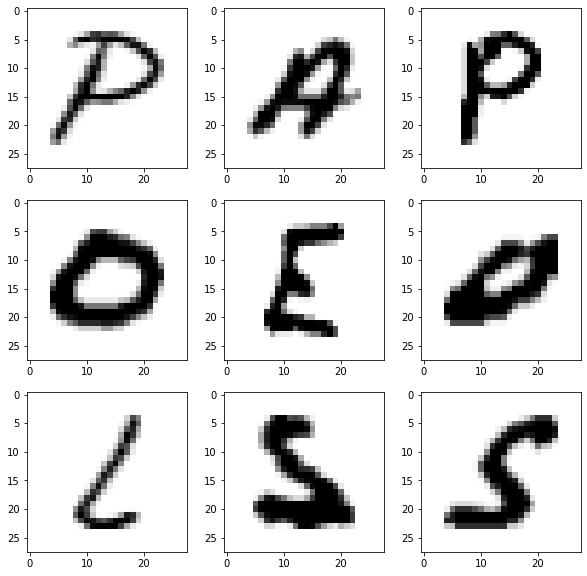

In [10]:
shuff = shuffle(train_x[:10])
fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()
for i in range(9):
    shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [11]:
#Data Reshaping
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

print("New shape of train data: ", train_X.shape)
test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)
print("New shape of train data: ", test_X.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of train data:  (74490, 28, 28, 1)


In [12]:
#converting the single float values to categorical values.

train_yOHE = to_categorical(train_y, num_classes = 26, dtype='int')
print("New shape of train labels: ", train_yOHE.shape)
test_yOHE = to_categorical(test_y, num_classes = 26, dtype='int')
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [13]:
train_X = train_X.reshape(-1, 28, 28, 1)

In [14]:

from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import backend as k
import tensorflow

model = tf.keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Flatten())
model.add(Dense(64,activation ="relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(26,activation ="softmax"))

In [15]:
#compile and fit the Model
model.compile(optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_yOHE, epochs=3,  validation_data = (test_X,test_yOHE))

Epoch 1/3
9312/9312 [==============================] - 286s 30ms/step - loss: 0.1527 - accuracy: 0.9574 - val_loss: 0.1126 - val_accuracy: 0.9690
Epoch 2/3
9312/9312 [==============================] - 296s 32ms/step - loss: 0.0711 - accuracy: 0.9803 - val_loss: 0.0654 - val_accuracy: 0.9830
Epoch 3/3
9312/9312 [==============================] - 299s 32ms/step - loss: 0.0591 - accuracy: 0.9837 - val_loss: 0.0698 - val_accuracy: 0.9824


In [16]:
#save the Model summary
model.summary()
model.save(r'model_char.h5')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 128)         73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 2, 128)         0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0

In [17]:
#Accuracy results
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.969029426574707, 0.9829641580581665, 0.9823734760284424]
The training accuracy is : [0.9574003219604492, 0.9802657961845398, 0.98373943567276]
The validation loss is : [0.11261207610368729, 0.06537725031375885, 0.06978578865528107]
The training loss is : [0.15265138447284698, 0.07108685374259949, 0.059113502502441406]


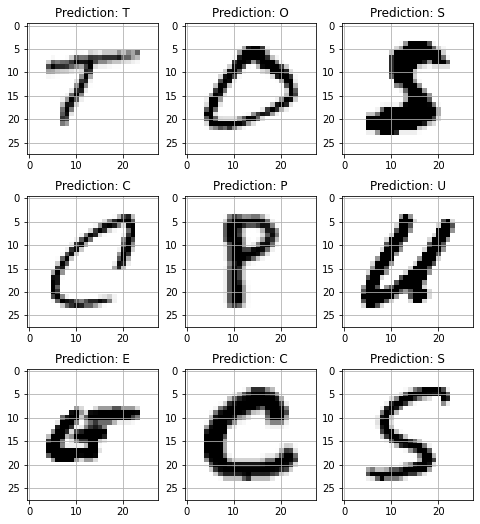

In [18]:
#graphical representation
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()
# To showing the 9 images we will loop though the data from test model and will predict the 
# images on the basis of CNN model of keras/tensorflow. 
for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()
#Here we go below are the results 